<a href="https://colab.research.google.com/github/tanishqbololu/PyTorch/blob/main/9_ann_fashion_mnist_pytorch_gpu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [27]:
# Set random seeds for reproducibility
torch.manual_seed(42)

In [28]:
# Check for GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: ",device)

Using device:  cuda


In [29]:
df = pd.read_csv("/content/drive/MyDrive/AI Engineer Notes/PyTorch/fashion-mnist_train.csv")
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


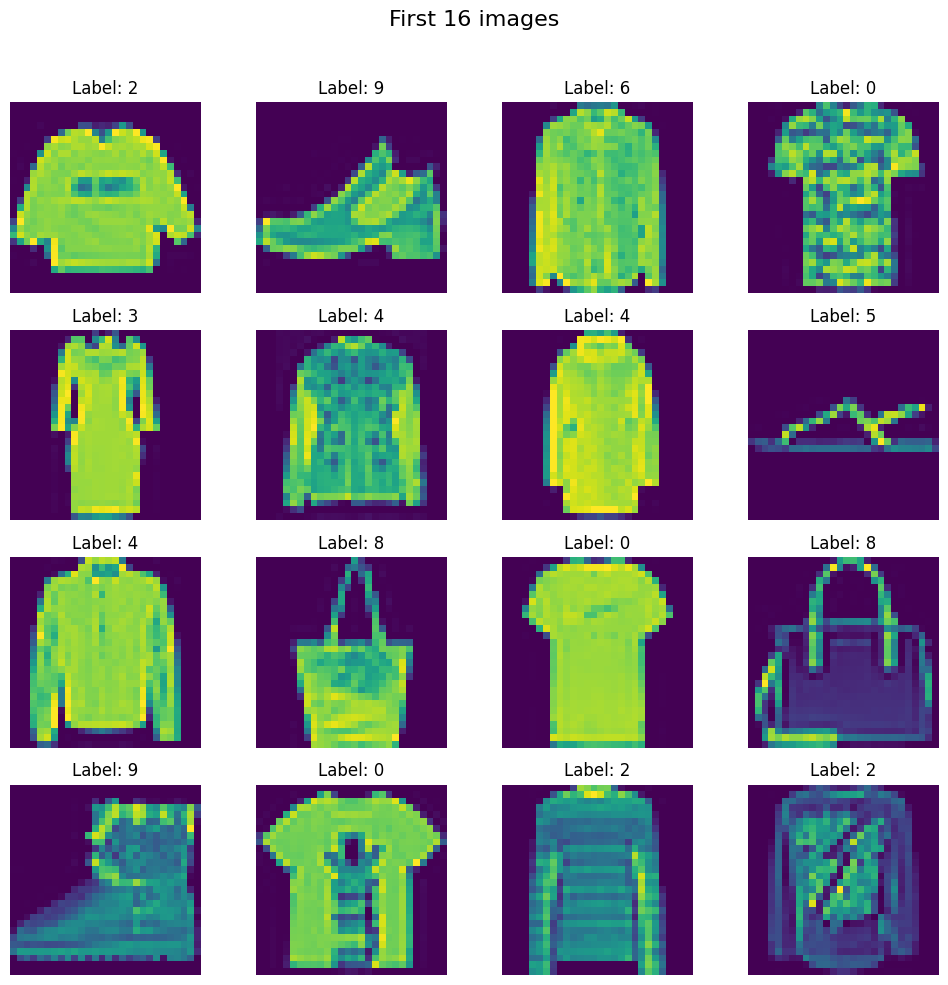

In [30]:
# Create a 4x4 grid of images
fig, axes = plt.subplots(4, 4, figsize=(10, 10))
fig.suptitle("First 16 images", fontsize=16)

# Plot the first 16 images from the dataset
for i, ax in enumerate(axes.flat):
  img = df.iloc[i, 1:].values.reshape(28,28) # Reshape to 28x28
  ax.imshow(img)
  ax.axis("off") # Remove axis for a cleaner look
  ax.set_title(f"Label: {df.iloc[i, 0]}")  # Show the label

plt.tight_layout(rect=[0,0,1,0.96]) # Adjust the layout to fit the title
plt.show()


In [31]:
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
# Scaling features
# Because in a NN all values should be from 0-1
X_train = X_train/255.0
X_test = X_test/255.0

In [34]:
X_train

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.00392157, 0.        ,
        0.        ]])

In [35]:
# create CustomerDataset Class
class CustomerDataset(Dataset):
  def __init__(self, features, labels):
    self.features = torch.tensor(features, dtype=torch.float32)
    self.labels = torch.tensor(labels, dtype=torch.long)   # torch.long = int64 tensor

  def __len__(self):
    return len(self.features)

  def __getitem__(self, index):
    return self.features[index], self.labels[index]

In [36]:
# create train_dataset object
train_dataset = CustomerDataset(X_train, y_train)

In [37]:
train_dataset[0]

(tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.2275,
         0.5333, 0.0000, 0.0

In [38]:
len(train_dataset)

48000

In [39]:
# create test_dataset object
test_dataset = CustomerDataset(X_test, y_test)

In [40]:
len(test_dataset)

12000

In [41]:
# create train and test loader
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, pin_memory=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, pin_memory=True)

In [43]:
# define NN Class
class MyNN(nn.Module):

  def __init__(self, num_features):

    super().__init__()
    self.model = nn.Sequential(
        nn.Linear(num_features,128),
        nn.BatchNorm1d(128),
        nn.ReLU(),
        nn.Dropout(p=0.3),
        nn.Linear(128,64),
        nn.BatchNorm1d(64),
        nn.ReLU(),
        nn.Dropout(p=0.3),
        nn.Linear(64,10)
    )

  def forward(self, x):
    return self.model(x)

In PyTorch unline Tensorflow we You usually DO NOT add Softmax at the output layer because CrossEntropyLoss already applies it internally. We dine it to use CrossEntropyLoss

In [44]:
# Set learning rate and epochs
epochs = 100
learning_rate = 0.1

In [45]:
# instantiate the model
model = MyNN(X_train.shape[1])
model = model.to(device)  # Create first, move second
# loss function
criterion = nn.CrossEntropyLoss()

# optimizer
optimizer = optim.SGD(model.parameters(), lr = learning_rate, weight_decay=1e-4)

In [46]:
len(train_loader)

1500

In [47]:
# training loop
for epoch in range(epochs):

  total_epoch_loss = 0.0

  for batch_features, batch_labels in train_loader:

    # move to gpu
    batch_features = batch_features.to(device)
    batch_labels = batch_labels.to(device)

    # forward pass
    outputs = model(batch_features)

    # calculate loss
    loss = criterion(outputs, batch_labels)

    # backward pass
    optimizer.zero_grad()
    loss.backward()

    # update grads
    optimizer.step()

    total_epoch_loss = total_epoch_loss + loss.item()

  avg_loss = total_epoch_loss/len(train_loader)
  print(f"Epoch: {epoch+1}, Loss: {avg_loss:.4f}")

Epoch: 1, Loss: 0.6249
Epoch: 2, Loss: 0.4920
Epoch: 3, Loss: 0.4556
Epoch: 4, Loss: 0.4338
Epoch: 5, Loss: 0.4172
Epoch: 6, Loss: 0.4056
Epoch: 7, Loss: 0.3942
Epoch: 8, Loss: 0.3858
Epoch: 9, Loss: 0.3744
Epoch: 10, Loss: 0.3726
Epoch: 11, Loss: 0.3678
Epoch: 12, Loss: 0.3572
Epoch: 13, Loss: 0.3505
Epoch: 14, Loss: 0.3449
Epoch: 15, Loss: 0.3447
Epoch: 16, Loss: 0.3373
Epoch: 17, Loss: 0.3344
Epoch: 18, Loss: 0.3302
Epoch: 19, Loss: 0.3306
Epoch: 20, Loss: 0.3262
Epoch: 21, Loss: 0.3208
Epoch: 22, Loss: 0.3183
Epoch: 23, Loss: 0.3226
Epoch: 24, Loss: 0.3146
Epoch: 25, Loss: 0.3134
Epoch: 26, Loss: 0.3142
Epoch: 27, Loss: 0.3107
Epoch: 28, Loss: 0.3091
Epoch: 29, Loss: 0.3046
Epoch: 30, Loss: 0.3056
Epoch: 31, Loss: 0.3050
Epoch: 32, Loss: 0.2990
Epoch: 33, Loss: 0.2957
Epoch: 34, Loss: 0.3025
Epoch: 35, Loss: 0.2976
Epoch: 36, Loss: 0.2933
Epoch: 37, Loss: 0.2965
Epoch: 38, Loss: 0.2943
Epoch: 39, Loss: 0.2970
Epoch: 40, Loss: 0.2927
Epoch: 41, Loss: 0.2901
Epoch: 42, Loss: 0.2930
E

In [48]:
# set model to eval mode
model.eval()  # --> sets model to evaluation mode, swtich off dropout and BatchNorm


MyNN(
  (model): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Dropout(p=0.3, inplace=False)
    (4): Linear(in_features=128, out_features=64, bias=True)
    (5): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): Dropout(p=0.3, inplace=False)
    (8): Linear(in_features=64, out_features=10, bias=True)
  )
)

In [49]:
len(test_loader)

375

each batch size is 38

In [50]:
# evaluation code on test data
total = 0
correct = 0

with torch.no_grad():
  for batch_features, batch_labels in test_loader:

    # move to gpu
    batch_features = batch_features.to(device)
    batch_labels = batch_labels.to(device)

    outputs = model(batch_features)

    _, predicted = torch.max(outputs, 1)   # here we picked the class with maximum probability given by softmax
    # _ means: ignore the first return (values)

    total = total + batch_labels.shape[0]
    correct = correct + (predicted == batch_labels).sum().item()

accuracy = correct/total
print(accuracy)


0.88325


In [51]:
# evaluation code on train data
total = 0
correct = 0

with torch.no_grad():
  for batch_features, batch_labels in train_loader:

    # move to gpu
    batch_features = batch_features.to(device)
    batch_labels = batch_labels.to(device)

    outputs = model(batch_features)

    _, predicted = torch.max(outputs, 1)   # here we picked the class with maximum probability given by softmax
    # _ means: ignore the first return (values)

    total = total + batch_labels.shape[0]
    correct = correct + (predicted == batch_labels).sum().item()

accuracy = correct/total
print(accuracy)


0.9325416666666667
